## Importing Library

In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 


sns.set_context("notebook", font_scale=1.2)
pd.set_option("display.max_columns" , None)
warnings.filterwarnings("ignore")
%matplotlib inline

## Load Data

In [6]:
df = pd.read_csv("Sample - Superstore.csv" , encoding='latin1')

## Initial Data Exploration

In [7]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [9]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [10]:
df.shape

(9994, 21)

## Checking Missing Values & Duplicates

In [11]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df.drop_duplicates(inplace=True)

## Conver to Datetime

In [14]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])


## Values Counts for Key Categorycal Features

In [15]:
for col in ['Category' , 'Region'] : 
     print( f"\n values count for {col}:")
     print( df[col].value_counts())


 values count for Category:
Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64

 values count for Region:
Region
West       3203
East       2848
Central    2323
South      1620
Name: count, dtype: int64


## Exploratory Data Analysis (EDA)

### Corelation Matrix

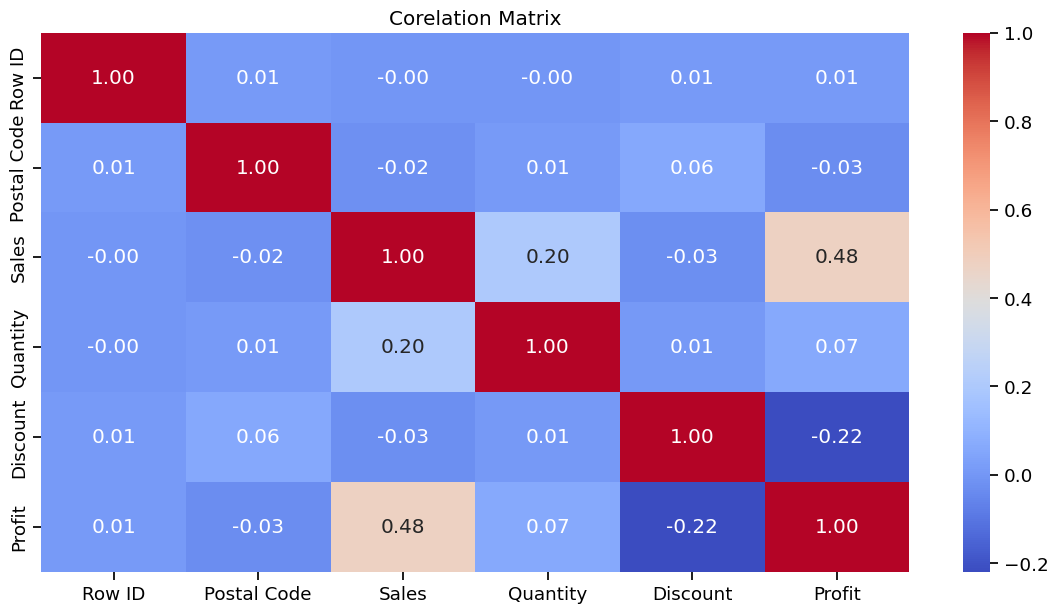

In [16]:
plt.figure(figsize=(14,7))
sns.heatmap(df.corr(numeric_only=True) , annot=True , cmap='coolwarm' , fmt=".2f")
plt.title("Corelation Matrix")
plt.show()

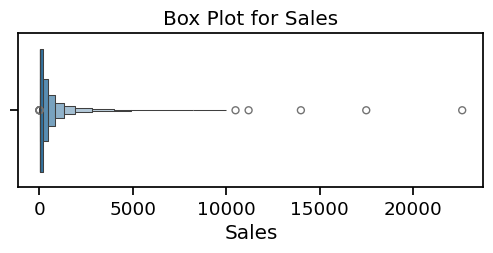

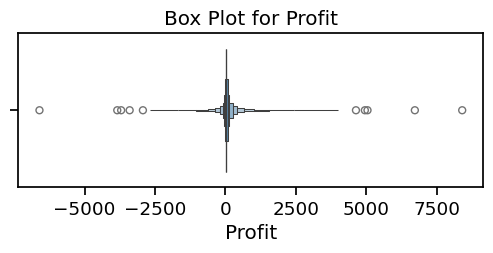

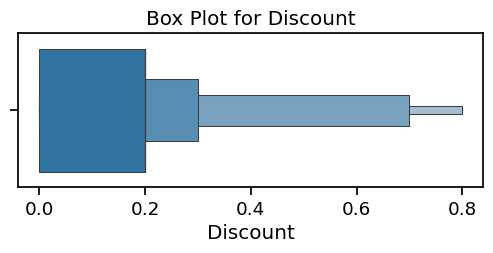

In [17]:
for col in ['Sales' , 'Profit' , 'Discount'] :
     plt.figure(figsize=(6,2))
     sns.boxenplot(x=df[col])
     plt.title(f"Box Plot for {col}")
     plt.show()

### Handle Outliers

In [18]:
q_low = df['Profit'].quantile(0.01)
q_high = df['Profit'].quantile(0.99)

df_cleane = df[(df['Profit']>q_low)&(df['Profit']<q_high)]

## Feature Enginnering

In [19]:
df['YearMonth'] = df['Order Date'].dt.to_period('M')
df['OrderY'] =  df['Order Date'].dt.year
df['OrderM'] = df['Order Date'].dt.month

In [20]:
df['Discount Sales'] = df['Sales']*(1-df['Discount'])
df['Sales Per Quantity'] = df['Sales']/ df['Quantity']
df['Profit Margin'] = df['Profit'] / df['Sales']
df['Shipping Time'] = (df['Ship Date']- df['Order Date']).dt.days

## Monthly Sales Trend

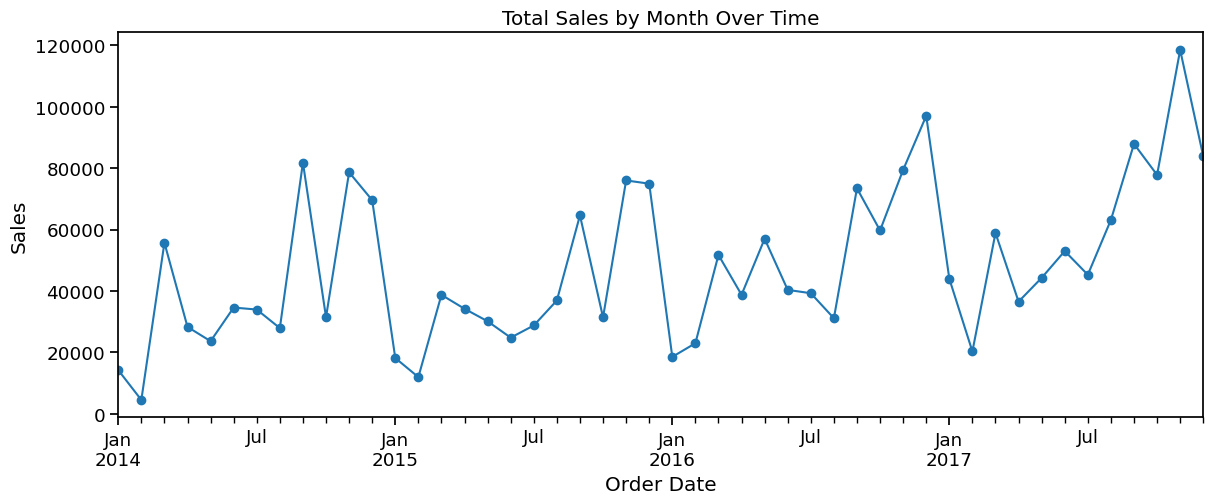

In [21]:
sales_month = df.groupby('YearMonth')['Sales'].sum()
plt.figure(figsize=(14,5))
sales_month.plot(marker="o")
plt.title('Total Sales by Month Over Time')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.show()

## Heatmap

### Monthly Sales Per Year

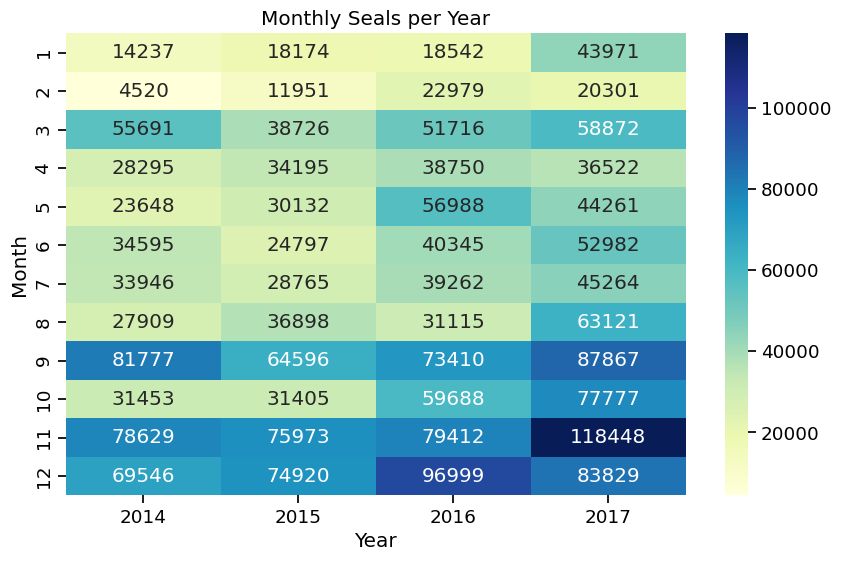

In [22]:
pivot = df.pivot_table(index="OrderM" , columns="OrderY" , values="Sales" , aggfunc="sum")

plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True , fmt='.0f', cmap='YlGnBu')
plt.title("Monthly Seals per Year")
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()

Line Plot

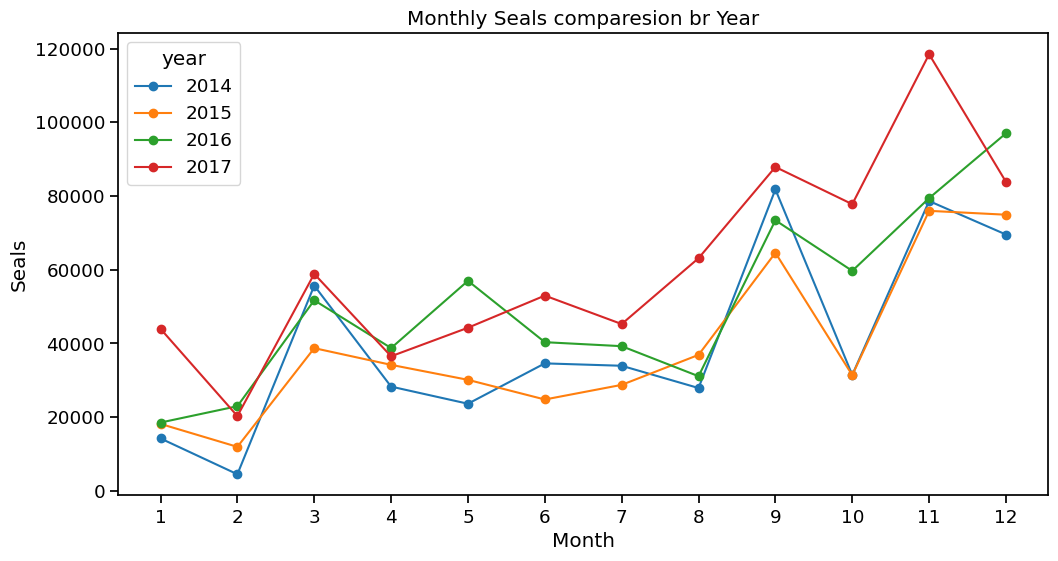

In [23]:
plt.figure(figsize=(12,6))

for year in pivot.columns :
     plt.plot(pivot.index,pivot[year] , marker= 'o' , label= str(year) )

plt.title("Monthly Seals comparesion br Year")
plt.xlabel("Month")
plt.ylabel("Seals")
plt.legend(title= "year")
plt.xticks(pivot.index)
plt.show()

Bar Plot

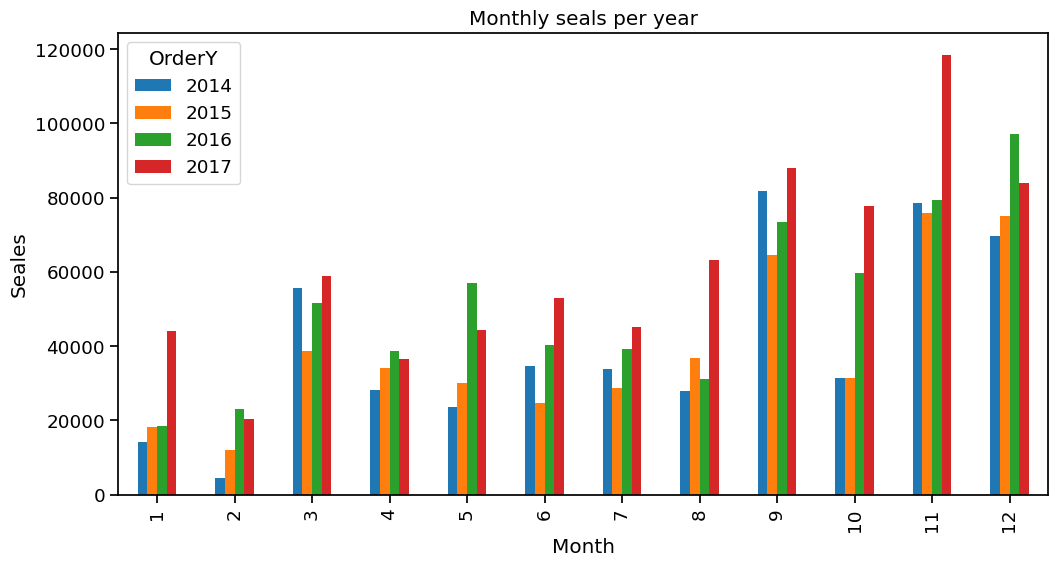

In [24]:
pivot.plot(kind='bar', figsize=(12,6))

plt.xlabel("Month")
plt.ylabel("Seales")
plt.title('Monthly seals per year')
plt.show()

## Analysis Sales by Region

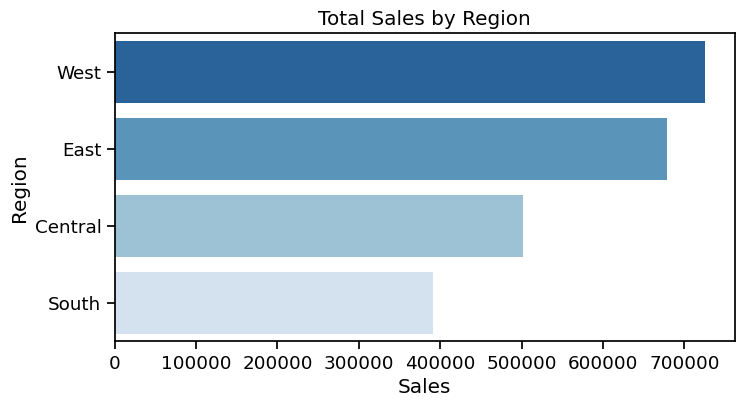

In [25]:
top_regions = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(8,4))
sns.barplot(x=top_regions.values , y= top_regions.index , palette='Blues_r')
plt.xlabel('Sales')
plt.ylabel('Region')
plt.title('Total Sales by Region')
plt.show()

## Profitability Analysis

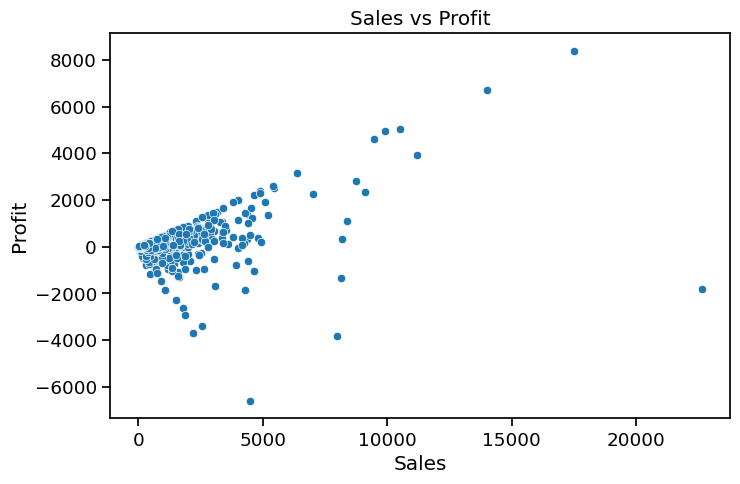

In [26]:
plt.figure(figsize=(8,5))
sns.scatterplot( x='Sales', y='Profit' , data=df)

plt.title('Sales vs Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()


## Analysis Sales by State

Text(0.5, 1.0, 'Top 20 States by Sales')

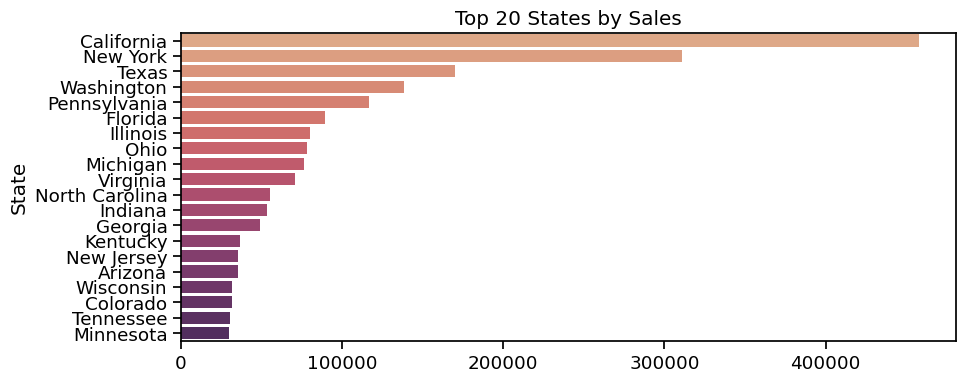

In [27]:
top_states = df.groupby('State')['Sales'].sum().sort_values(ascending=False).head(20)
plt.figure(figsize=(10,4))
sns.barplot(x=top_states.values , y=top_states.index ,palette='flare')
plt.title('Top 20 States by Sales')

## Analysis Sales by Cities

Text(0.5, 1.0, 'Top 20 Cities by Sales')

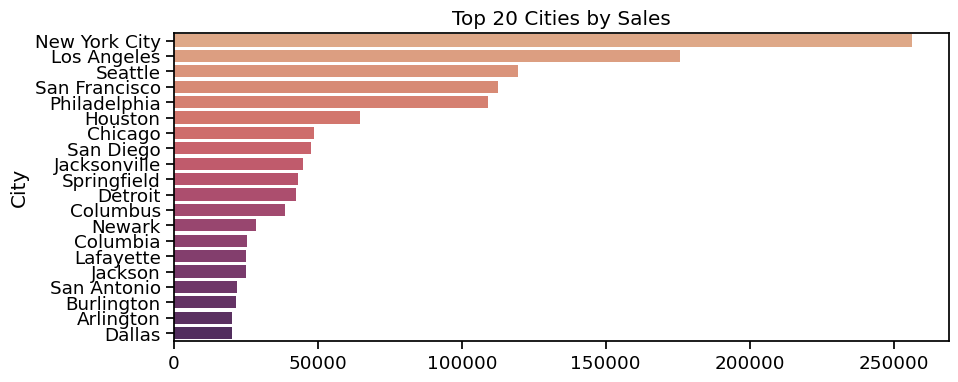

In [28]:
top_cities = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(20)
plt.figure(figsize = (10,4))
sns.barplot(x=top_cities.values , y=top_cities.index , palette='flare')
plt.title('Top 20 Cities by Sales')

## Category & Sub-Category Sales Analysis

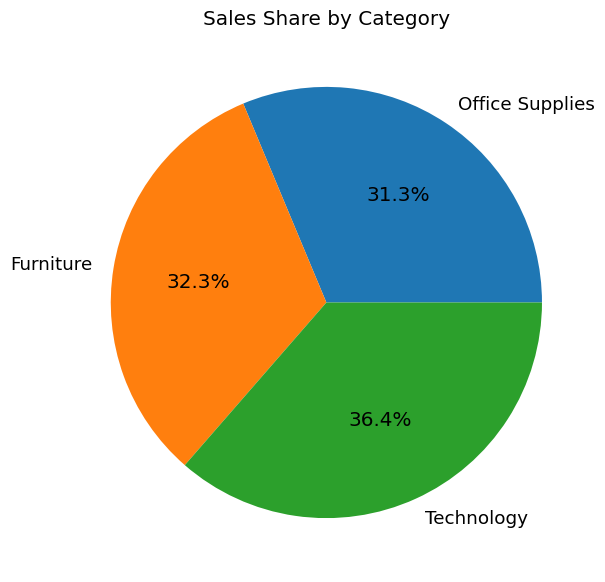

In [29]:
cat_sales = df.groupby('Category')['Sales'].sum().sort_values()

plt.figure(figsize=(10,7))
cat_sales.plot(kind='pie' , autopct='%1.1f%%' ,title='Sales Share by Category')
plt.ylabel("")
plt.show()

## Analysis Profit by Category

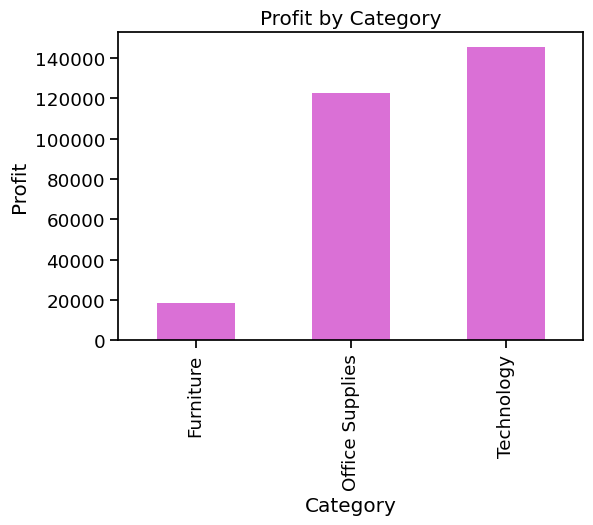

In [30]:
profit_by_cat = df.groupby('Category')['Profit'].sum().sort_values(ascending=True)

plt.figure(figsize=(6,4))
profit_by_cat.plot(kind='bar',color='orchid', title='Profit by Category')
plt.ylabel('Profit')
plt.show()


## Analysis Profit by Category and Region

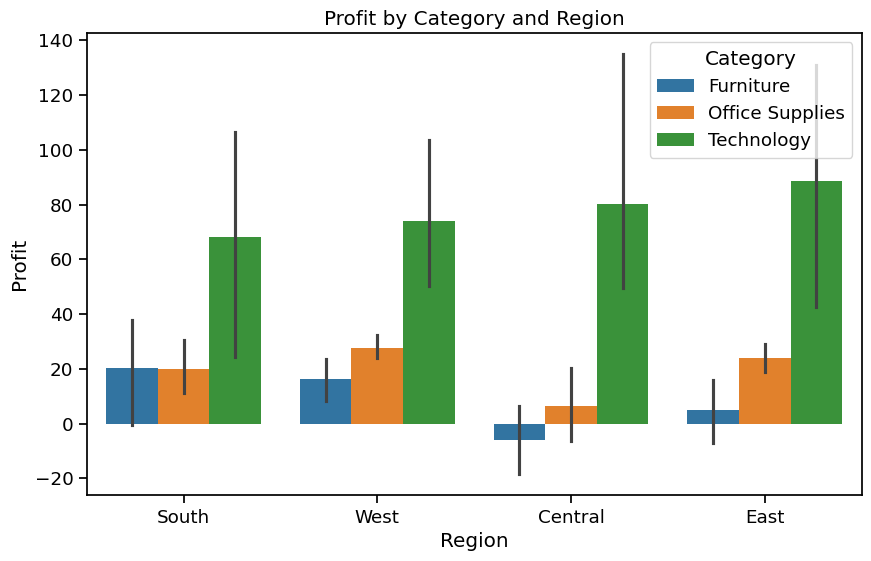

In [31]:
plt.figure(figsize=(10,6))
sns.barplot(data=df , x='Region' , y='Profit' , hue='Category')
plt.title('Profit by Category and Region')
plt.show()

## Analysis Impact of Discount on Profit

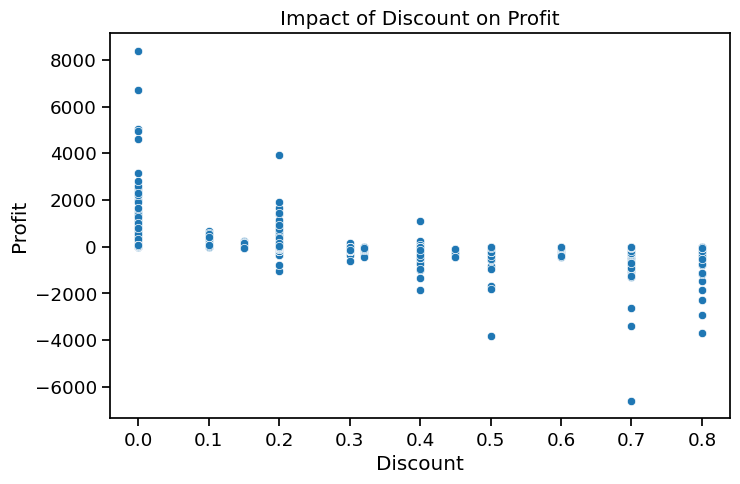

In [32]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Discount' , y='Profit' , data=df)
plt.title('Impact of Discount on Profit')
plt.show()

## Loss Making Sub-Categories Analysis

In [33]:
loss_prod = df.groupby('Sub-Category')['Profit'].sum().sort_values().head(10)
print('Most Loss-Making Sub-Categories : ')
loss_prod

Most Loss-Making Sub-Categories : 


Sub-Category
Tables        -17725.4811
Bookcases      -3472.5560
Supplies       -1189.0995
Fasteners        949.5182
Machines        3384.7569
Labels          5546.2540
Art             6527.7870
Envelopes       6964.1767
Furnishings    13059.1436
Appliances     18138.0054
Name: Profit, dtype: float64

## Profit Distribution 

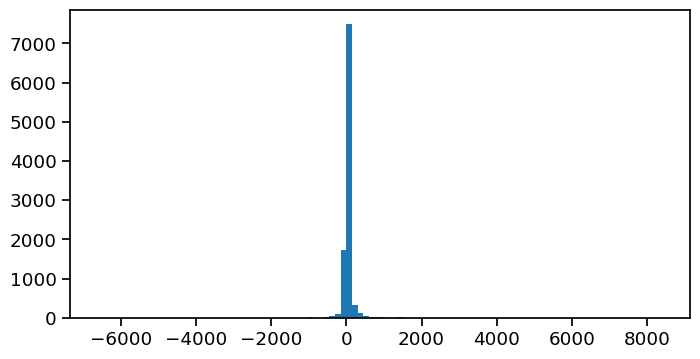

In [34]:
plt.figure(figsize=(8,4))
plt.hist(df["Profit"] , bins=100)
plt.show()

## Analysis Top Customer Sales

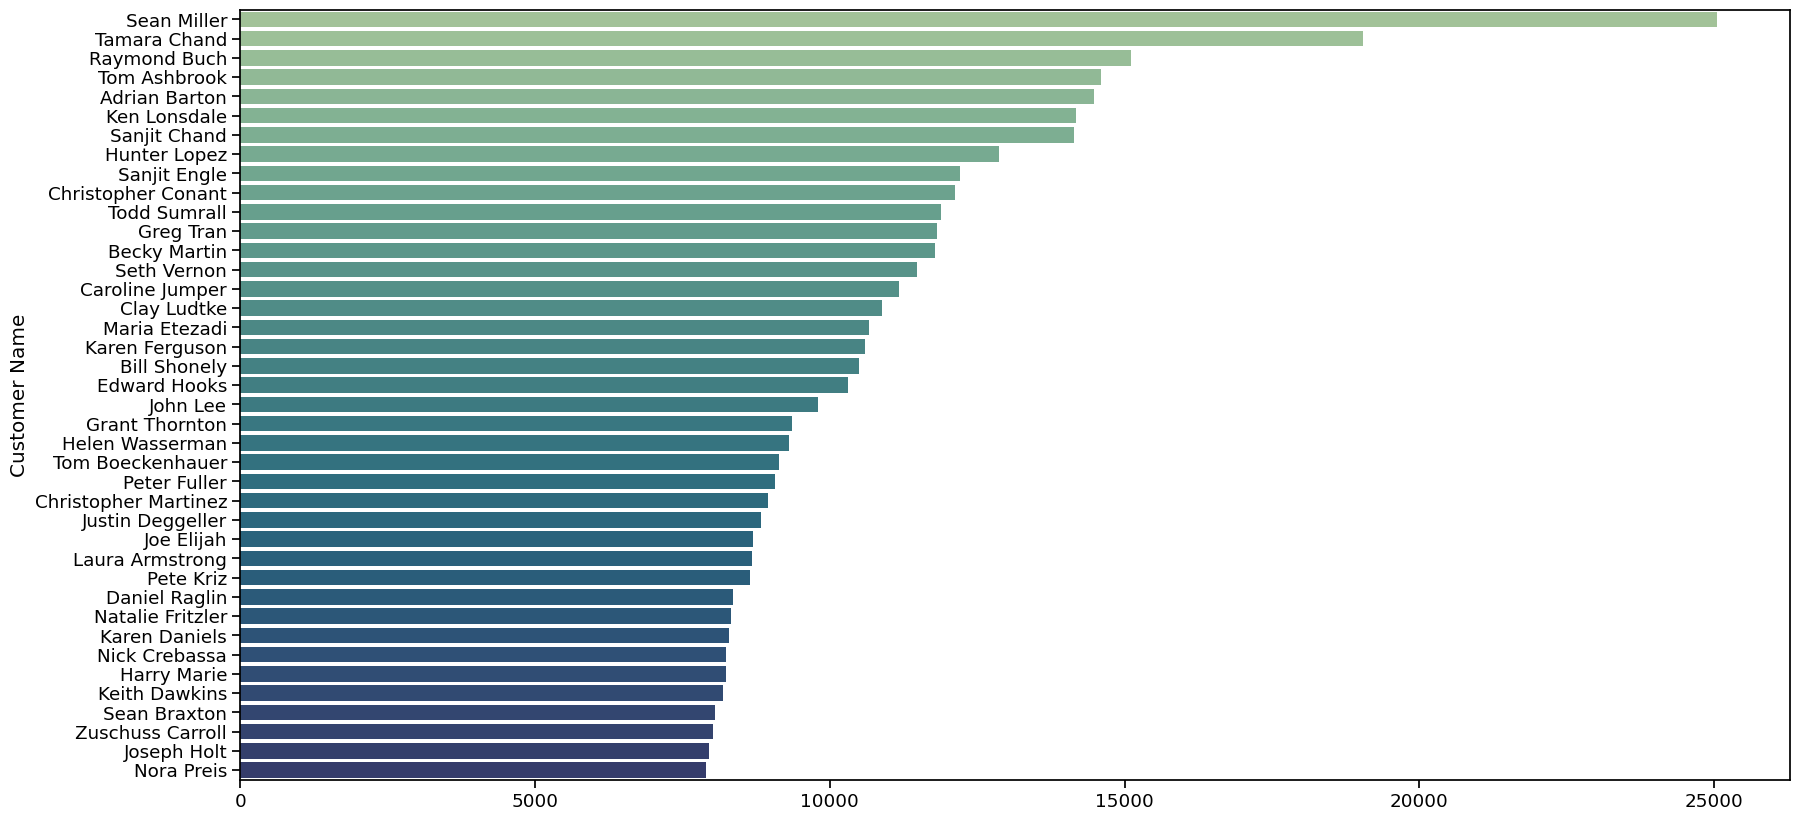

In [35]:
top_customer = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(40)
plt.figure(figsize=(20,10))
sns.barplot(x=top_customer.values , y=top_customer.index , palette='crest')
plt.show()

## Analysis Top Customers Profit

<Axes: ylabel='Customer Name'>

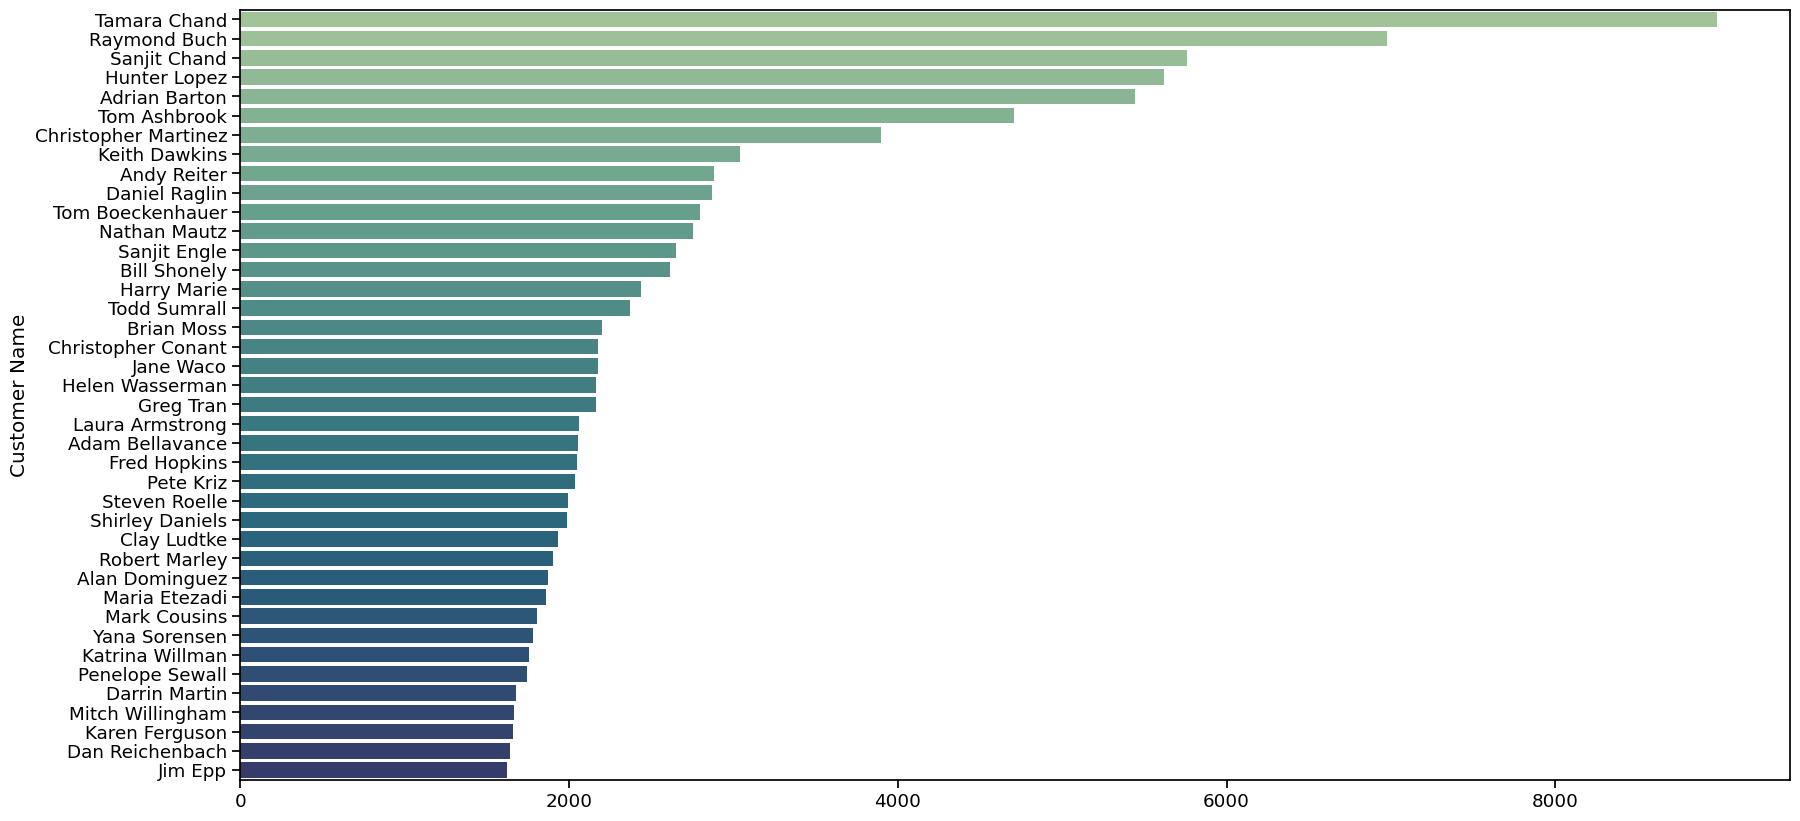

In [36]:
top_customer_profit = df.groupby('Customer Name')['Profit'].sum().sort_values(ascending=False).head(40)
plt.figure(figsize=(20,10))
sns.barplot(x=top_customer_profit.values , y=top_customer_profit.index , palette='crest')

## Average Profit Margin by Category

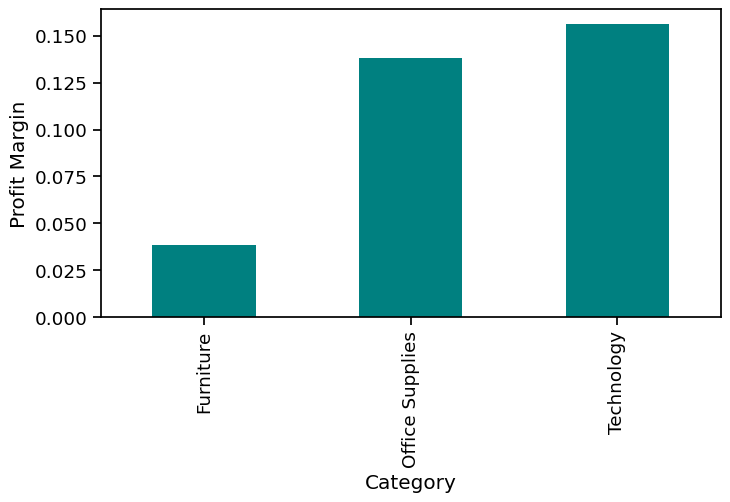

In [37]:
margin_by_category = df.groupby('Category')['Profit Margin'].mean().sort_values()
plt.figure(figsize=(8,4))
margin_by_category.plot(kind='bar', color="teal")
plt.ylabel('Profit Margin')
plt.xlabel('Category')
plt.show()

## Average Sales by Sub-Category

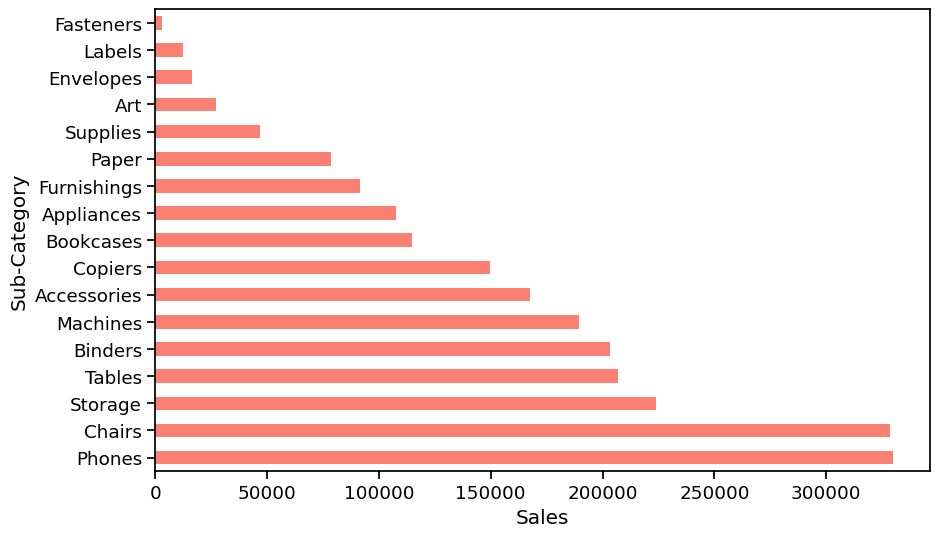

In [38]:
subcat_by_sales = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,6))
subcat_by_sales.plot(kind='barh' , color="salmon")
plt.xlabel('Sales')
plt.show()

## Average Profit by Sub-Category

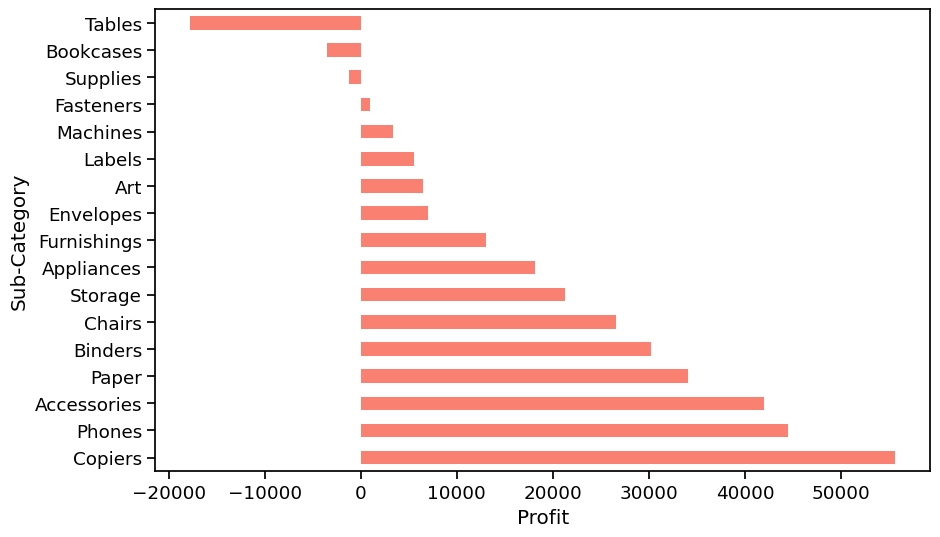

In [39]:
subcat_by_sales = df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,6))
subcat_by_sales.plot(kind='barh' , color="salmon")
plt.xlabel('Profit')
plt.show()

## Average Profit Margin by Sub-Category

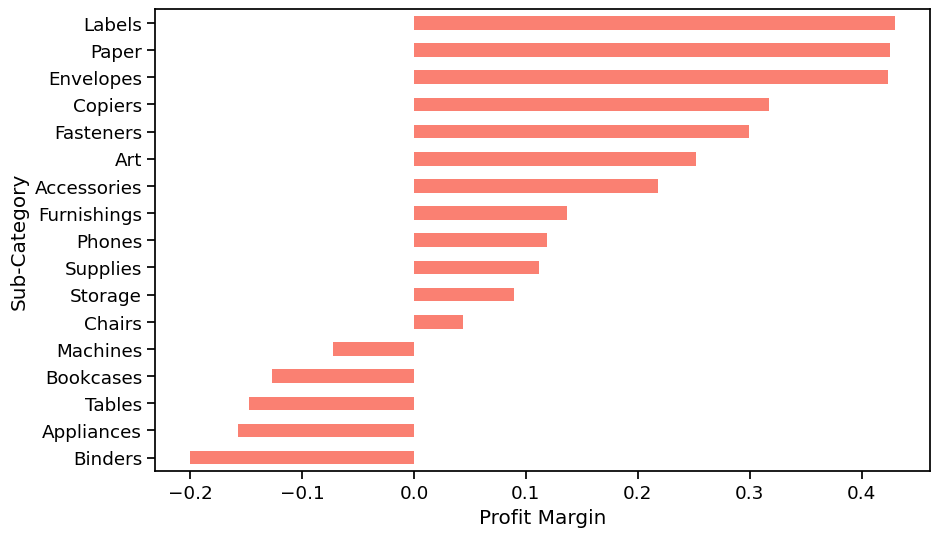

In [40]:
subcat_by_sales = df.groupby('Sub-Category')['Profit Margin'].mean().sort_values(ascending=True)
plt.figure(figsize=(10,6))
subcat_by_sales.plot(kind='barh' , color="salmon")
plt.xlabel('Profit Margin')
plt.show()

## Shipping Time Distribution 

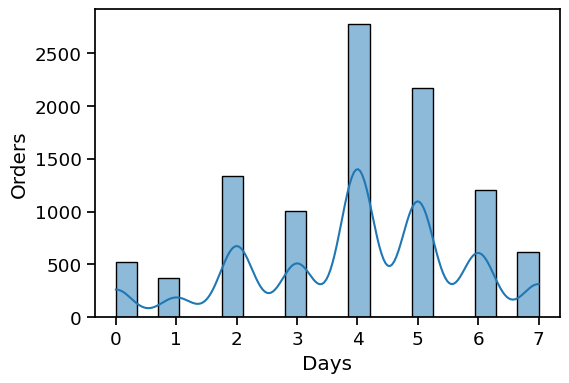

In [41]:
plt.figure(figsize=(6,4))
sns.histplot(df['Shipping Time'], bins=20 , kde=True)
plt.xlabel('Days')
plt.ylabel('Orders')
plt.show()

## Customer Analysis : RFM Segmention

Plot

In [42]:
latest_date = df['Order Date'] .max()
rfm = df.groupby('Customer ID').agg({
  'Order Date' : lambda x:(latest_date - x.max()).days , 
  'Order ID': 'nunique',
  'Sales' : 'sum'
})

rfm.rename(columns={'Order Date': 'Recency' , 'Order ID' : 'Frequency' , 'Sales' : 'Monetary'} , inplace= True)
rfm.head()

,Recency,Frequency,Monetary
Customer ID,,,
AA-10315,184,5,5563.560
AA-10375,19,9,1056.390
AA-10480,259,4,1790.512
AA-10645,55,6,5086.935
AB-10015,415,3,886.156


KMeans fit and Cluster Plot

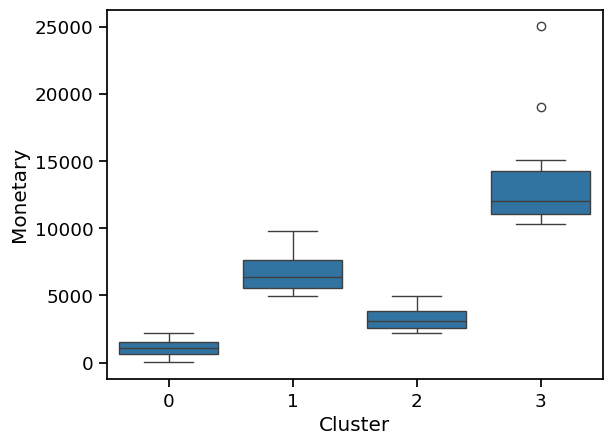

In [43]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4 , random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm)
sns.boxplot(x='Cluster' , y='Monetary' , data= rfm)
plt.show()

## Shipping Analysis 

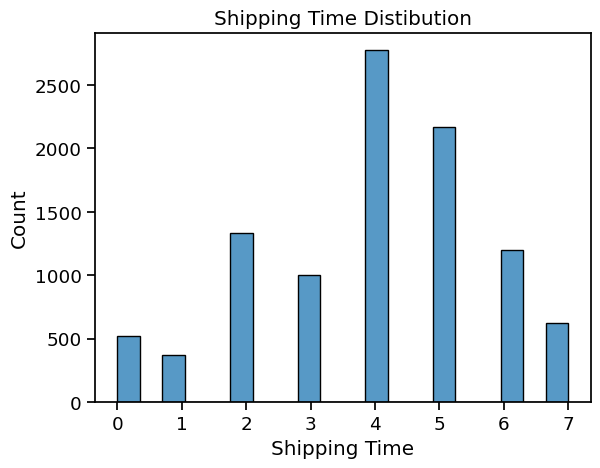

In [44]:
sns.histplot(df['Shipping Time'] , bins=20)
plt.title('Shipping Time Distibution')
plt.show()

## Trend Smoothing - Moving Average 

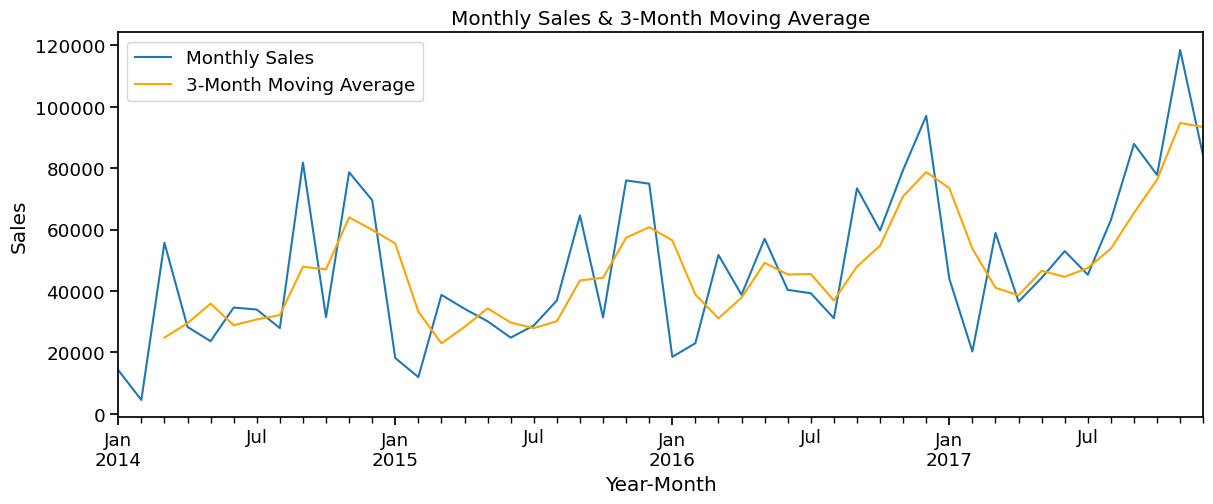

In [45]:
sales_month_smooth = sales_month.rolling(window=3).mean()
plt.figure(figsize=(14,5))
sales_month.plot(label='Monthly Sales')
sales_month_smooth.plot(label='3-Month Moving Average', color='orange')
plt.title('Monthly Sales & 3-Month Moving Average')
plt.xlabel('Year-Month')
plt.ylabel('Sales')
plt.legend()
plt.show()

## Total Sales by Year 

<Axes: ylabel='OrderY'>

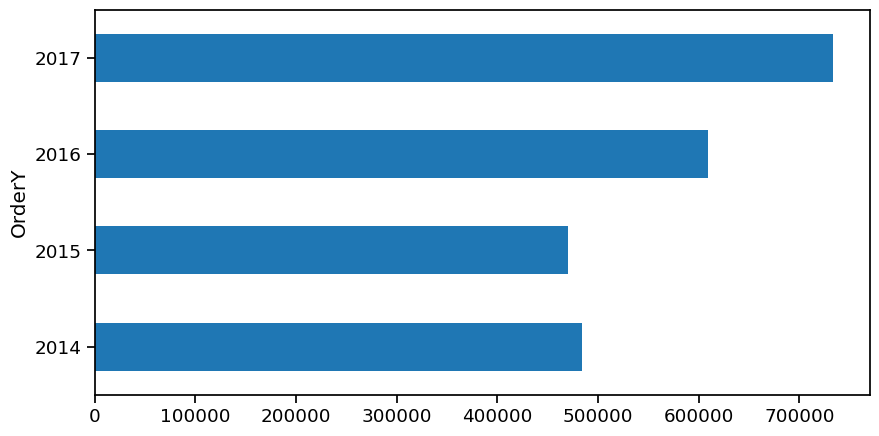

In [46]:
plt.figure(figsize=(10,5))
df.groupby('OrderY')['Sales'].sum().plot.barh()

## Total Profit by Year  

<Axes: ylabel='OrderY'>

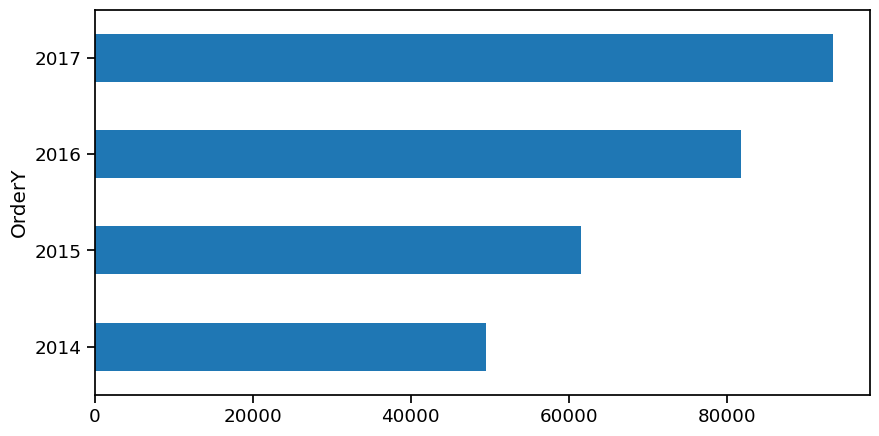

In [47]:
plt.figure(figsize=(10,5))
df.groupby('OrderY')['Profit'].sum().plot.barh()

### Seasonal Decomposition of Sales (Time Series Analysis)

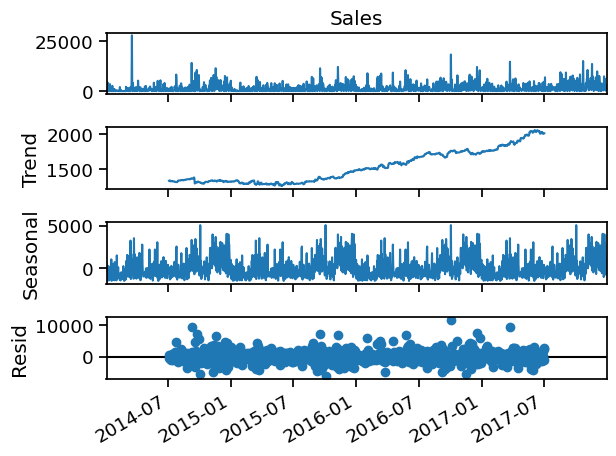

In [49]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.dates as mdates

sales_ts = df.groupby('Order Date')['Sales'].sum().asfreq('D').fillna(0)
result = seasonal_decompose(sales_ts, model='additive' , period= 365)

result.plot()
plt.gcf().autofmt_xdate()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.tight_layout()
plt.show()

### MOnthly Sales Trend Over thr Year 

<Axes: title={'center': 'Sales has been growing year by year'}, xlabel='OrderY,OrderM'>

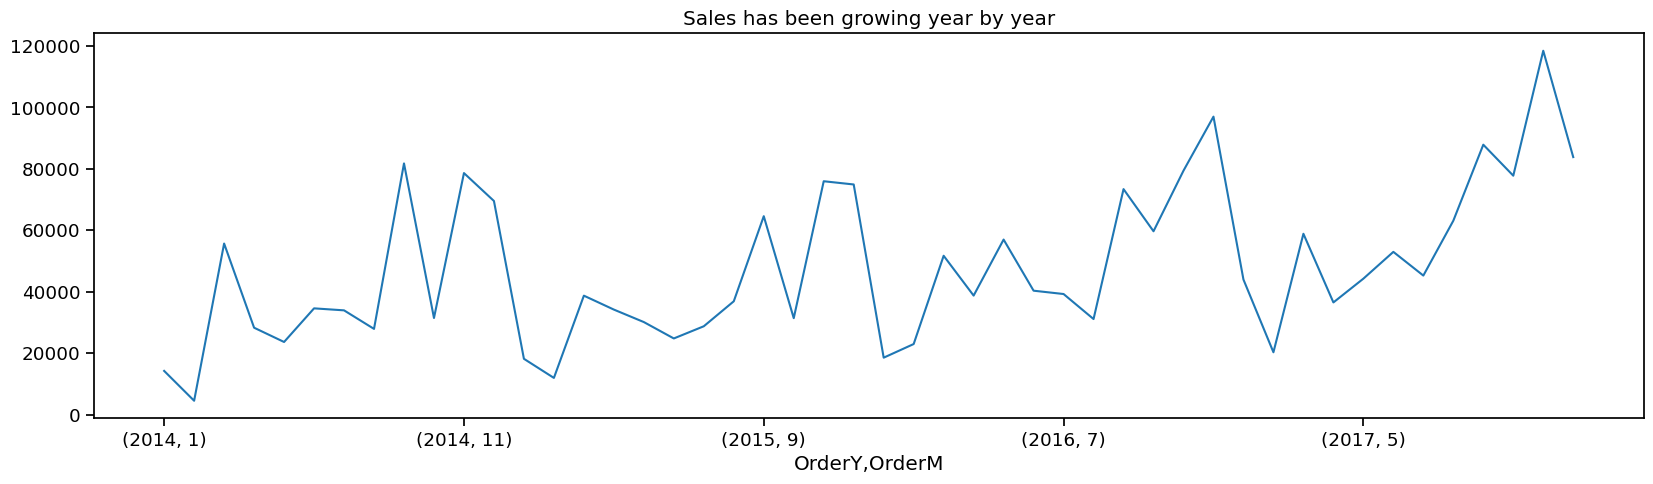

In [51]:
plt.figure(figsize=(20,5))
plt.title ('Sales has been growing year by year')

df.groupby(['OrderY','OrderM'])['Sales'].sum().plot()

### Monthly Profit Trend Over the Year 

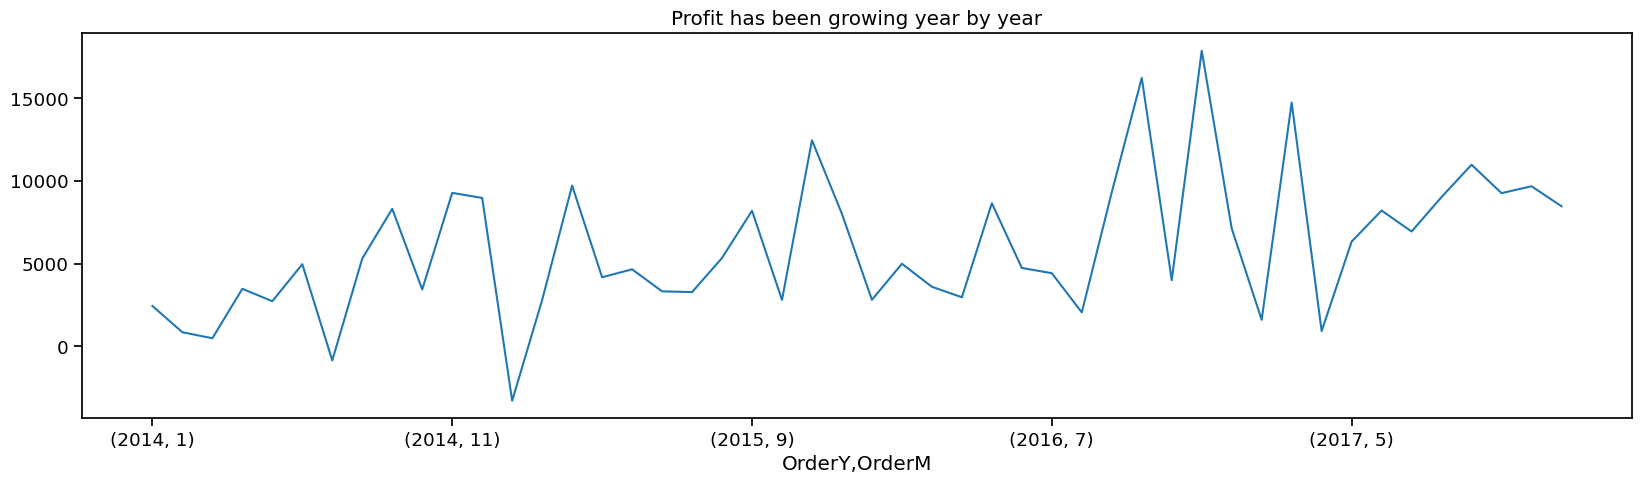

In [52]:
plt.figure(figsize=(20,5))
plt.title('Profit has been growing year by year')

df.groupby(['OrderY', 'OrderM'])['Profit'].sum().plot()
plt.show()